In [ ]:
# ~добавить описание вводимых переменных: сделано
N = 20 # количесвто точек на траектории самолета
dT = 1. # длительность излучения импульса
c = 30 # скорость света
w = 90/dT # частота сигнала

In [ ]:
# ОБЩИЕ КОММЕНТАРИИ
# - изучить библиотеку "typing". Сделать аннотацию типов и документацию к функциям
# - начать работать в pycharm
# - добавить кnbомментарии, описания вводимых переменных
# - давать переменным осмысленные, интуитивно-понятные имена
# - загрузить материалы на github и добавить пользователя frolov.ilia@phystech.edu
# - не использовать глобальные переменные, все передавать в аргументах функций

In [ ]:
from scipy import interpolate 
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import cmath
from typing import List, Callable, Tuple, Any
from functools import partial

# ~добавить библиотеки: сделано

In [ ]:
def S(fi: float,o: float,y: float)->List[List[float]]:
     """
     Функция возвращает матрицу поворота, в зависимости от входных параметров 
     
     :param fi: угол относительно курса
     :param o: угол тангажа
     :param y: угол крена
     """
   # ~в радианы перевести в начале функции: сделано
     fi = fi*np.pi/180 # угол относительно курса в радианах
     o = o*np.pi/180 # угол тангажа в радианах
     y = y*np.pi/180 # угол крена в радианах

     S = [[np.cos(fi)*np.cos(y)+np.sin(fi)*np.sin(o)*np.sin(y),-np.sin(fi)*np.cos(y)+np.cos(fi)*np.sin(o)*np.sin(y),np.cos(o)*np.sin(y)],
          [np.sin(fi)*np.cos(o),np.cos(fi)*np.cos(o),np.sin(o)],
          [np.cos(fi)*np.sin(y)-np.sin(fi)*np.sin(o)*np.cos(y),-np.sin(fi)*np.sin(y)-np.cos(fi)*np.sin(o),np.cos(o)*np.cos(y)]]
     
     return S


In [ ]:
# ~добавить описание вводимых переменных: сделано

X_Plane = [0]*N # Список из X компоненты координат положения самолета
Y_Plane = [0]*N # Список из Y компоненты координат положения самолета
Z_Plane = [0]*N # Список из X компоненты координат положения самолета
t_Plane = [0]*N # Список моментов времени, которым соответсвуют X,Y,Z координаты 
fi1 = [0]*N # угол относительно курса самолета
o1 = [0]*N # угол тангажа самолета 
y1 = [0]*N # угол крена самолета
fi2 = [0]*N # угол относительно курса радиолокатора 
o2 = [0]*N # угол тангажа радиолокатора 
y2 = [0]*N # угол крена радиолокатора

# заполняем значениями  координат самолета 

for i in range(N):
    X_Plane[i]=i*1
for i in range(N):
    Y_Plane[i]=i*1
for i in range(N):
    Z_Plane[i]=i*1
for i in range(N):
    t_Plane[i]=i

# заполняем значениями угла крена, тангажа и рысканья для самолета и радиолокатора 

for i in range(N):
    fi1[i]=random.random()
for i in range(N):
    o1[i]=random.random()
for i in range(N):
    y1[i]=random.random()

for i in range(N):
    fi2[i]=random.random()
for i in range(N):
    o2[i]=random.random()
for i in range(N):
    y2[i]=random.random()

In [ ]:
# Создаем дискретное время
Tstart = 4. # начальный момент время
dis = 0.01 #период дискретизации времени 
# ~добавить описание вводимых переменных: сделано
P = 1000 # количество отсчетов 

# Создание и заполнение оцифровки времени

Time_Global=[0]*P # Вводится список состоящий из мементов времени 
for k in range(P):
    Time_Global[k]=Tstart+dis*k

In [ ]:
# интерполируем координаты положения самолета

fx = interpolate.interp1d(t_Plane,X_Plane,kind='cubic')
fy = interpolate.interp1d(t_Plane,Y_Plane,kind='cubic')
fz = interpolate.interp1d(t_Plane,Z_Plane,kind='cubic')

# интерполируем ориентацию самолета в ГСК(глобальная система координат)

Fi1 = interpolate.interp1d(t_Plane,fi1,kind='cubic')
O1 = interpolate.interp1d(t_Plane,o1,kind='cubic')
Y1 = interpolate.interp1d(t_Plane,y1,kind='cubic')

# интерполируем ориентацию РЛ(Радиолокатора) в системе координат самолета

Fi2 = interpolate.interp1d(t_Plane,fi2,kind='cubic')
O2 = interpolate.interp1d(t_Plane,o2,kind='cubic')
Y2 = interpolate.interp1d(t_Plane,y2,kind='cubic')


In [ ]:
n = 4 # количество строк матрицы G, M и Thetta
m = 5 # количество столбцов матрицы G, M и Thetta
# ~либо описать в начале все обозначения (G, тетта), либо в коде прописывать (Коэффициент усиления, угол крена и т.д.)
G = np.zeros((n,m)) # матрица значений G(коэффициента усиления от каждого элемента поверхности)  
M = np.zeros((n,m,3)) # матрица координат точек на поверхности размером nXm, содержащая 3 координаты: X,Y,Z 
Theta = np.random.rand(n,m) # матрица значений Thetta(сдвига фаз в градусах от каждого элемента поверхности) 

# заполняем матрицу M:

for i in range(n):
    for j in range(m):
        M[i][j][0] = i*50
        M[i][j][1] = j*50
        M[i][j][2] = 0

# заполняем матрицу G:

for i in range(n):
    for j in range(m):
        G[i][j] = 1
for i in range(n):
    G[i][int(m/2)] = 2

# заполняем матрицу Thetta:
    
for i in range(n):
    for j in range(m):
        Theta[i][j] = 1
for i in range(n):
    Theta[i][int(m/2)] = (np.pi/2)/180



In [ ]:

# функция рассчета времени на распрстранение до поверхности и обратно
# ~поменять название на "calculate_delay": сделано
def calculate_delay(A: List[float], B: List[float]) -> float:
    """
    Функция рассчитывает и возращает задержку времени на распространение сигнала 

    :param A: список, состоящий из 3 координат положения радиолокатора
    :param B: список, состоящий из 3 координат точки на поверхности 
    """
    return 2*np.linalg.norm(A-B)/(c)


In [ ]:
def sinusoidal_pulse(t: float, w: float) -> complex:
    """
    Функция возращает значение сигнала в момент времени t
    : param t: момент времени
    : param w: частота сигнала 
    """
    return np.sin(w*t) + 0j

# ~добавить аннотации типов и документацию
# ~импульс задавать в общем виде функцией
def Function(T: float, pulse: Callable[[float], complex]) -> Tuple[List(complex), int, int]:
    """
    Функция возращает кортеж из 3 элементов:
     1) список состоящий из оцифровок суммарной амплитуды принятого сигнала
     2) длину принятого сигнала в отсчетах 
     3) номер отсчета начала приема сигнала


    :param T: момент времени излучения импульса 
    :param pulse: функция, описывающая импульс радиолокатора 
    """
    l = 0 # счетчик
    r = 0 # счетчик
    A = np.zeros((n*m,int(dT/dis),2)) # матрица, содеращая в себе амплитуду и номер отсчета времени приема принятого отраженного сигнала от каждой(всего nxm) точки 
    v = (fx(T),fy(T),fz(T)) # интерполированное значение координат положения самолета в момент времени T

    # запись амплитуды принятого отраженного сигнала в А и соотвеатвующий ей номер отсчета k

    for i in range(n):
        for j in range(m):
            for k in range(P):
                delay = calculate_delay(v,M[i][j])
                if Time_Global[k] >= T+delay and Time_Global[k] <= T + delay + dT:
                    A[l][r][0] = k
                    A[l][r][1] = pulse(Time_Global[k] - T - delay)*np.exp(1j*Theta[i][j])*G[i][j] # записывается амплитуда принятого сигнала с учетом сдвига по фазе и коэффициента усиления точки поверхности 
                    r = r + 1
            l = l + 1
            r = 0
    # ~локальные переменные не должны с зарезервированными словами:сделано
    # ~(вместо "max" прописать "max_num_samples"):сделано
    max_num_samples = 0 # максимальный номер отсчета 
    min_num_samples = None # минимальный номер отсчета 
    
    #суммирование амплитуд, соотвествующих одному и тому же моменту времени k 

    for i in range(n*m):
        for j in range(int(dT/dis)):
            if A[i][j][0] >= max_num_samples:
                max_num_samples = A[i][j][0]
            if min_num_samples is None or A[i][j][0] <= min_num_samples:
                min_num_samples = A[i][j][0]

    u = int(max_num_samples + 1) - int(min_num_samples) # длительность приема одного импульса в количестве отсчетов 
    sum = np.zeros(u) # список состоящий из суммарных амплитуд. 
    s = 0 # счетчик
    # заполнение списка sum. Kаждая следующая амплитуда соответсвует следующему номеру отсчета k
    for i in range(int(min_num_samples),int(max_num_samples + 1),1):
        for j in range(n*m):
            for k in range(int(dT/dis)):
                if int(A[j][k][0]) == i:
                    sum[s]=sum[s] + A[j][k][1]
        s = s + 1
    # на выходе функции 1) список амплитуд, каждая следующая амплитуда соответсвует следующему номеру отсчета k 
    # 2) количество отсчетов 3) номер минимального отсчета(первого отсчета)
    return (sum, max_num_samples-min_num_samples + 1, min_num_samples)


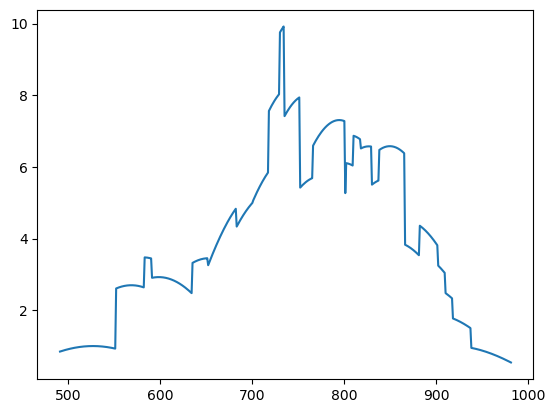

In [ ]:
w = ...
pulse = partial(sinusoidal_pulse, w=w)
v = Function(5, pulse = pulse)[1]

go = [0]*int(v)
for i in range(int(v)):
    go[i] = i+int(v)
plt.plot(go,Function(5)[0])
plt.show()

In [732]:
f=[0]*3
Ts=(4.3,5,9)
for i in range(3):
    f[i]=Function(Ts[i])[0]
print(f[2])
print(f[1])  

[ 0.84163422  0.85001309  0.85818224  0.86613964  0.87388334  0.88141142
  0.88872202  0.89581335  0.90268364  0.90933122  0.91575443  0.92195169
  0.92792147  0.9336623   0.93917276  0.9444515   0.94949721  0.95430864
  0.95888461  0.963224    0.96732572  0.97118877  0.97481219  0.97819509
  0.98133663  0.98423605  0.98689262  0.98930569  0.99147466  0.99339901
  0.99507824  0.99651196  0.9976998   0.99864147  0.99933674  0.99978544
  0.99998746  0.99994275  0.99965132  0.99911323  0.99832864  0.99729771
  0.99602072  0.99449798  0.99272986  0.9907168   2.67899258  2.69306887
  2.70648069  2.71922473  2.73129784  2.74269704  2.75341952  2.76346264
  2.77282391  2.78150103  2.78949186  2.79679442  2.80340692  2.80932771
  2.81455535  2.81908854  2.82292615  2.82606726  2.82851107  2.83025699
  2.83130459  2.83165361  2.83130396  2.83025572  2.82850917  2.82606472
  3.66612828  3.67063013  3.6742263   3.67691591  3.6786983   3.67957303
  3.67953987  3.67859885  3.67675018  3.67399433  3